In [157]:
import pandas as pd
import numpy as np

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns. A dataframe consists of one or more series.
  * **`Series`**, which is a single column. Each row can be labeled via an index. A DataFrame contains one or more Series and a name for each Series.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

In [158]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [159]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [160]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [161]:
# shows the first 5 rows of the data by default
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [162]:
# shows the last 5 rows of the data by default
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [163]:
# shows the dimensions of the data frame (#samples, #features)
df.shape

(442, 10)

In [164]:
# see the column names of the data frame
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

Get a concise summary of a DataFrame:

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


The `describe` method of the dataframe gives descriptive statistics(like: mean, median, count, min, max value, etc) of the numerical columns in your dataframe. If there are any non-numerical columns, those are skipped.

In [166]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


Transposing a dataframe:

In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


#### Selection

Selecting specific things from the data frame:

1. Getting a specific column

In [168]:
df['age']

0      0.038076
1     -0.001882
2      0.085299
3     -0.089063
4      0.005383
         ...   
437    0.041708
438   -0.005515
439    0.041708
440   -0.045472
441   -0.045472
Name: age, Length: 442, dtype: float64

2. Get the first five values of the column age:

In [169]:
df['age'][:5]

0    0.038076
1   -0.001882
2    0.085299
3   -0.089063
4    0.005383
Name: age, dtype: float64

3. Get a few specific columns out of the entire dataframe (kind of like a subset of the dataframe):

In [170]:
# selecting the age and sex columns out of the dataframe
df[['age', 'sex']].head()

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642


In [171]:
df[['s1', 's2', 's3', 's4', 's5', 's6']].head()

,s1,s2,s3,s4,s5,s6
0,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


#### `.iloc` function allows selecting data by Integer location

.iloc - integer location

+ Selecting a single specific row 

say you want to select the row with index 3 (i.e. the 4th row):

In [172]:
# gives the fourth row(index 3) of the data frame
df.iloc[3]

age   -0.089063
sex   -0.044642
bmi   -0.011595
bp    -0.036656
s1     0.012191
s2     0.024991
s3    -0.036038
s4     0.034309
s5     0.022688
s6    -0.009362
Name: 3, dtype: float64

+ get a value at a specific (row, column) index:

say you want the value that occurs in the 3rd row (so, index will be 2) at the 4th column (so the column index will be 3):

In [173]:
df.iloc[2, 3]

-0.00567042229275739

+ Selecting multiple specific rows using a list of integers

say you want to obtain only the rows at index 3 and 4:

In [174]:
# return the rows at index 3 and 4
df.iloc[[3, 4]]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


+ say you want to get the first 3 columns for only the rows with index 3 and 4:

In [175]:
# the first argument specifies the rows we want and the second argument specifies the columns we want using a slice
df.iloc[[3,4], :3]

,age,sex,bmi
3,-0.089063,-0.044642,-0.011595
4,0.005383,-0.044642,-0.036385


+ get the column numbers: 0, 2 and 3 for the last row:

In [176]:
# gives the data for only the columns at index 0, 2, and 3 of the last row
df.iloc[-1, [0, 2, 3]]

age   -0.045472
bmi   -0.073030
bp    -0.081413
Name: 441, dtype: float64

+ for the last 6 rows, get the last six columns(s1, s2, s3, s4, s5, s6):

In [177]:
df.iloc[-6:, -6:]

,s1,s2,s3,s4,s5,s6
436,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
437,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


#### `.loc` function to select by labels
The `.loc` function can select data by using labels:

Note: Read this amazingly well-explained [stack overflow answer](https://stackoverflow.com/a/46915810) for help if you're confused on loc and iloc.

In [178]:
df.loc[[3,4], 'age':'bmi']

,age,sex,bmi
3,-0.089063,-0.044642,-0.011595
4,0.005383,-0.044642,-0.036385


In [179]:
df.loc[[3,4], 's1':'s6']

,s1,s2,s3,s4,s5,s6
3,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [180]:
# for the rows at index 3 and 4, get only the age and bp columns
df.loc[[3,4], ["age", "bp"]]

,age,bp
3,-0.089063,-0.036656
4,0.005383,0.021872


The `.iloc` function uses integer indices for specifying rows and columns.

The `.loc` function can only uses labels to specify rows and columns for accessing specific things.
In the above example, the labels for rows are just numbers and columns have string labels.

#### Boolean selection using `.loc`

+ say you want to get all the rows where bmi is greater than 3.124802e-02

In [181]:
df.loc[df['bmi'] > 3.124802e-02]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504
16,-0.005515,-0.044642,0.042296,0.049415,0.024574,-0.023861,0.074412,-0.039493,0.052277,0.027917
...,...,...,...,...,...,...,...,...,...,...
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617


+ now, say you want to get all the rows where bmi is greater than 3.124802e-02 but you only want to get the columns: age and sex

In [182]:
df.loc[df.bmi > 3.124802e-02, ['age', 'bmi']]
# the first argument specifies the rows I want and the second one specifies the columns I want

,age,bmi
0,0.038076,0.061696
2,0.085299,0.044451
8,0.041708,0.061696
9,-0.070900,0.039062
16,-0.005515,0.042296
...,...,...
417,-0.052738,0.071397
422,-0.078165,0.077863
428,0.048974,0.088642
432,0.009016,0.055229


#### Creating a pandas dataframe from multiple series

In [183]:
# Example
cities = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

In [184]:
city_df = pd.DataFrame({ 'City name': cities, 'Population': population })
city_df

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


#### Creating a synthetic dataset using pandas

In [185]:
# create a pandas dataframe with 6 rows and 5 columns with random values

np.random.seed(100)
df2 = pd.DataFrame(np.random.rand(6, 5), columns=list('ABCDE'), index=list('abcdef'))
df2

,A,B,C,D,E
a,0.543405,0.278369,0.424518,0.844776,0.004719
b,0.121569,0.670749,0.825853,0.136707,0.575093
c,0.891322,0.209202,0.185328,0.108377,0.219697
d,0.978624,0.811683,0.171941,0.816225,0.274074
e,0.431704,0.940030,0.817649,0.336112,0.175410
f,0.372832,0.005689,0.252426,0.795663,0.015255


Now, in this dataframe our row and column indices are both strings.

This example is perfect to showcase that the `.loc` function only accepts labels for specifying rows and columns.

In [186]:
# select the rows at index a, c, and e and the columns B and D
df2.loc[['a', 'c', 'e'], ['B', 'D']]

,B,D
a,0.278369,0.844776
c,0.209202,0.108377
e,0.940030,0.336112


The following won't work because in this case our row index is not numeric:

`df2.loc[[0, 2, 4], 'B':'D']`

We can achieve the same thing using `.iloc` by using row and column indicies (instead of labels) like so:

In [187]:
df2.iloc[[0, 2, 4], [1, 3]]

,B,D
a,0.278369,0.844776
c,0.209202,0.108377
e,0.940030,0.336112


#### Evaluating conditionals on dataframes

+ selecting all rows where the value of the column A is greater than 0.7

In [188]:
df2[ df2['A'] > 0.7 ]

,A,B,C,D,E
c,0.891322,0.209202,0.185328,0.108377,0.219697
d,0.978624,0.811683,0.171941,0.816225,0.274074


+ selecting all rows where the value of column A > 0.7 AND column D < 0.2

In [189]:
df2[(df2['A'] > 0.7) & (df2['D'] < 0.2)]

,A,B,C,D,E
c,0.891322,0.209202,0.185328,0.108377,0.219697


+ OR operator in pandas is denoted by |

select all rows where A > 0.7 or D < 0.2

In [190]:
df2[(df2['A'] > 0.7) | (df2['D'] < 0.2)]

,A,B,C,D,E
b,0.121569,0.670749,0.825853,0.136707,0.575093
c,0.891322,0.209202,0.185328,0.108377,0.219697
d,0.978624,0.811683,0.171941,0.816225,0.274074


+ NOT operator in pandas is denoted with `~`

select all rows where A > 0.7 and D is not less than 0.2

In [191]:
df2[(df2['A'] > 0.7) & ~(df2['D'] < 0.2)]

,A,B,C,D,E
d,0.978624,0.811683,0.171941,0.816225,0.274074


#### Adding a new column to a dataframe

In [192]:
# create a new column F that is the sum of columns A and B
df2["F"] = df2["A"] + df2["B"]
df2

,A,B,C,D,E,F
a,0.543405,0.278369,0.424518,0.844776,0.004719,0.821774
b,0.121569,0.670749,0.825853,0.136707,0.575093,0.792318
c,0.891322,0.209202,0.185328,0.108377,0.219697,1.100524
d,0.978624,0.811683,0.171941,0.816225,0.274074,1.790307
e,0.431704,0.940030,0.817649,0.336112,0.175410,1.371734
f,0.372832,0.005689,0.252426,0.795663,0.015255,0.378521


In [193]:
df2["Names"] = ["Alice", "Bob", "Cathy", "Doug", "Edgar", "Fred"]
df2

,A,B,C,D,E,F,Names
a,0.543405,0.278369,0.424518,0.844776,0.004719,0.821774,Alice
b,0.121569,0.670749,0.825853,0.136707,0.575093,0.792318,Bob
c,0.891322,0.209202,0.185328,0.108377,0.219697,1.100524,Cathy
d,0.978624,0.811683,0.171941,0.816225,0.274074,1.790307,Doug
e,0.431704,0.940030,0.817649,0.336112,0.175410,1.371734,Edgar
f,0.372832,0.005689,0.252426,0.795663,0.015255,0.378521,Fred


#### Dropping Rows and Columns

- Use the `.drop` function on the dataframe
- Use axis=1 for dropping columns
- Use axis=0 for dropping rows

In [194]:
# remove  the columns A and C from the dataframe
df2.drop(["A", "C"], axis=1)

,B,D,E,F,Names
a,0.278369,0.844776,0.004719,0.821774,Alice
b,0.670749,0.136707,0.575093,0.792318,Bob
c,0.209202,0.108377,0.219697,1.100524,Cathy
d,0.811683,0.816225,0.274074,1.790307,Doug
e,0.940030,0.336112,0.175410,1.371734,Edgar
f,0.005689,0.795663,0.015255,0.378521,Fred


In [195]:
# drop the rows at index a and c from the dataframe
df2.drop(["a", "c"], axis=0)

,A,B,C,D,E,F,Names
b,0.121569,0.670749,0.825853,0.136707,0.575093,0.792318,Bob
d,0.978624,0.811683,0.171941,0.816225,0.274074,1.790307,Doug
e,0.431704,0.940030,0.817649,0.336112,0.175410,1.371734,Edgar
f,0.372832,0.005689,0.252426,0.795663,0.015255,0.378521,Fred


In [196]:
df2

,A,B,C,D,E,F,Names
a,0.543405,0.278369,0.424518,0.844776,0.004719,0.821774,Alice
b,0.121569,0.670749,0.825853,0.136707,0.575093,0.792318,Bob
c,0.891322,0.209202,0.185328,0.108377,0.219697,1.100524,Cathy
d,0.978624,0.811683,0.171941,0.816225,0.274074,1.790307,Doug
e,0.431704,0.940030,0.817649,0.336112,0.175410,1.371734,Edgar
f,0.372832,0.005689,0.252426,0.795663,0.015255,0.378521,Fred


#### Sampling from the dataframe

- use the `sample` method on the dataframe to randomly sample a certain number of rows from the dataframe
- use the `random_state` parameter to ensure that the samples chosen remain the same everytime

In [197]:
# sample 3 rows from the dataframe randomly (note that the samples will be different each time you run this)
df2.sample(3)

,A,B,C,D,E,F,Names
e,0.431704,0.940030,0.817649,0.336112,0.175410,1.371734,Edgar
b,0.121569,0.670749,0.825853,0.136707,0.575093,0.792318,Bob
c,0.891322,0.209202,0.185328,0.108377,0.219697,1.100524,Cathy


In [198]:
# by setting the random_state, the selected samples will be the same each time you run this
df2.sample(3, random_state=42)

,A,B,C,D,E,F,Names
a,0.543405,0.278369,0.424518,0.844776,0.004719,0.821774,Alice
b,0.121569,0.670749,0.825853,0.136707,0.575093,0.792318,Bob
f,0.372832,0.005689,0.252426,0.795663,0.015255,0.378521,Fred


#### Groupby

Three stages to using groupby
* Split - we split dataframe into multiple smaller dataframe based on the values of keys
* Apply - we apply desired aggregation/transformation on each dataframe.
* Combine - we combine results from apply state into a dataframe

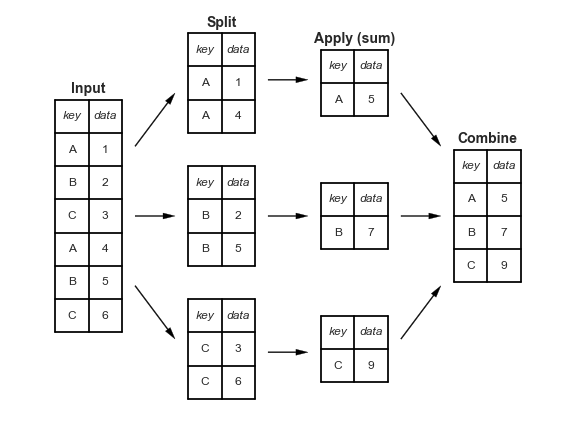

In [199]:
df3 = pd.DataFrame({'key': ['A','B','C','A','B','C'],
                   'data': range(6)})
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [200]:
df3.groupby('key').count()

,data
key,
A,2
B,2
C,2


In [201]:
df3.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### Applying user-defined functions onto columns

In [202]:
df4 = pd.DataFrame({"Number" : [1, 2, 3, 4, 5]})
df4

,Number
0,1
1,2
2,3
3,4
4,5


In [203]:
def square(x):
    return x ** 2

def factorial(x):
    if x <= 0:
        return 1
    else:
        return x * factorial(x - 1)
    
def cube(x):
    return x ** 3

def is_even(x):
    return "Even" if x % 2 == 0 else "Odd"

In [204]:
df4["Number Squared"] = df4["Number"].apply(square)
df4

,Number,Number Squared
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [206]:
df4["Number Cubed"] = df4.Number.apply(cube)
df4

,Number,Number Squared,Number Cubed
0,1,1,1
1,2,4,8
2,3,9,27
3,4,16,64
4,5,25,125


In [207]:
df4["Number Factorial"] = df4["Number"].apply(factorial)
df4

,Number,Number Squared,Number Cubed,Number Factorial
0,1,1,1,1
1,2,4,8,2
2,3,9,27,6
3,4,16,64,24
4,5,25,125,120


In [208]:
df4["Number Type"] = df4["Number"].apply(is_even)
df4

,Number,Number Squared,Number Cubed,Number Factorial,Number Type
0,1,1,1,1,Odd
1,2,4,8,2,Even
2,3,9,27,6,Odd
3,4,16,64,24,Even
4,5,25,125,120,Odd
